## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [128]:
#Q1.1
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

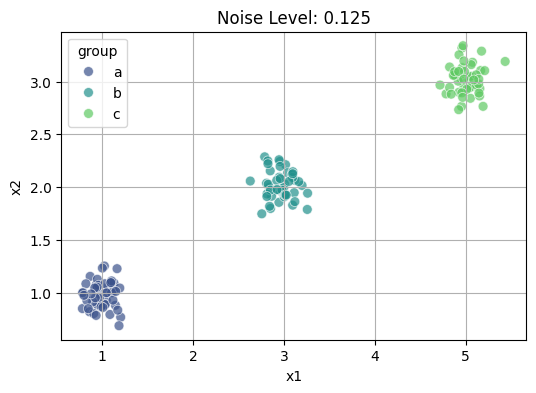

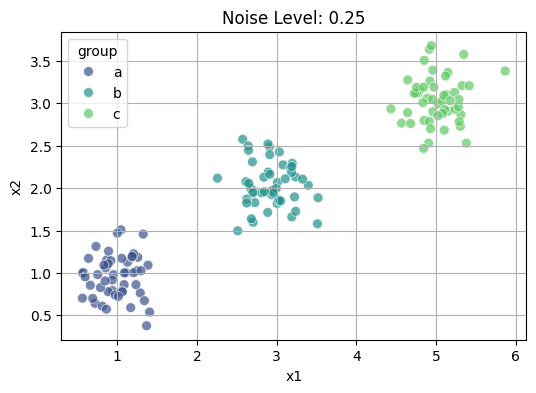

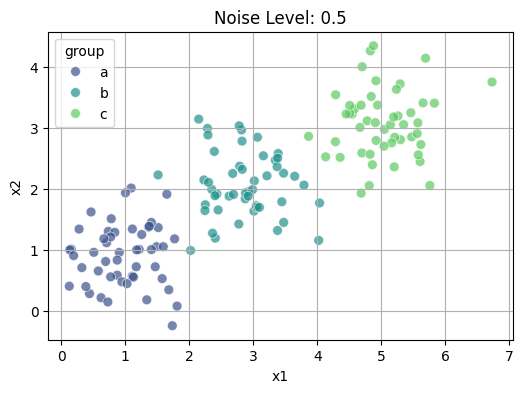

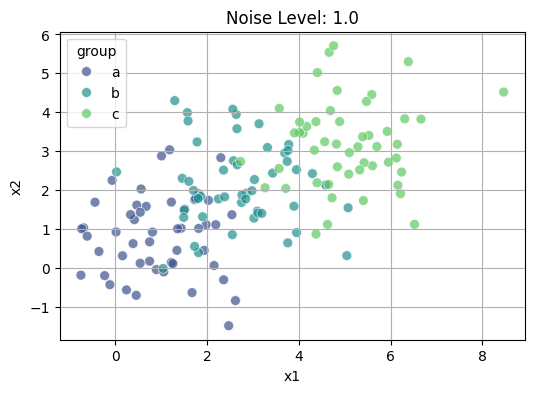

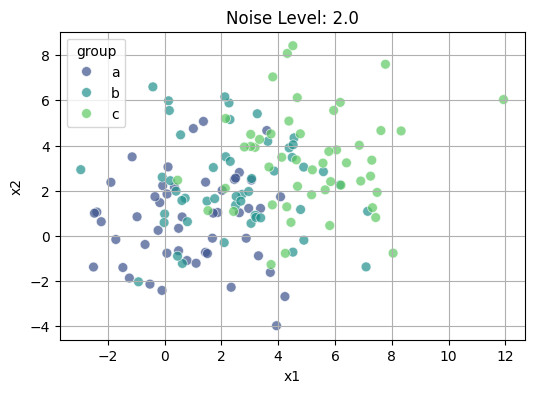

In [129]:
#2 Q2.2
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(df, title):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x='x1', y='x2', hue='group', palette='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.show()

plot_data(df0_125, 'Noise Level: 0.125')
plot_data(df0_25, 'Noise Level: 0.25')
plot_data(df0_5, 'Noise Level: 0.5')
plot_data(df1_0, 'Noise Level: 1.0')
plot_data(df2_0, 'Noise Level: 2.0')

When the noise level is low (like 0.125 or 0.25), the clusters look really clear and separated from each other. Once the noise goes up to around 0.5, they start spreading out more and even overlapping a bit. At a noise level of 1.0, the overlap gets worse and it’s harder to tell the clusters apart. By the time the noise is at 2.0, the clusters are basically all over each other, and it’s almost impossible to see distinct groups anymore.

In [130]:
#Q1.3
from sklearn.cluster import KMeans

dataframes = [df0_125, df0_25, df0_5, df1_0, df2_0]
inertia_values = {}

for i, df in enumerate(dataframes):
    inertia = []
    # Remove the 'group' column for clustering
    X = df.drop('group', axis=1)
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for newer sklearn versions
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    inertia_values[f'df{i}'] = inertia

# Store the inertia_values dictionary for later use (e.g., plotting)
# print(inertia_values) # Optional: print to verify the output

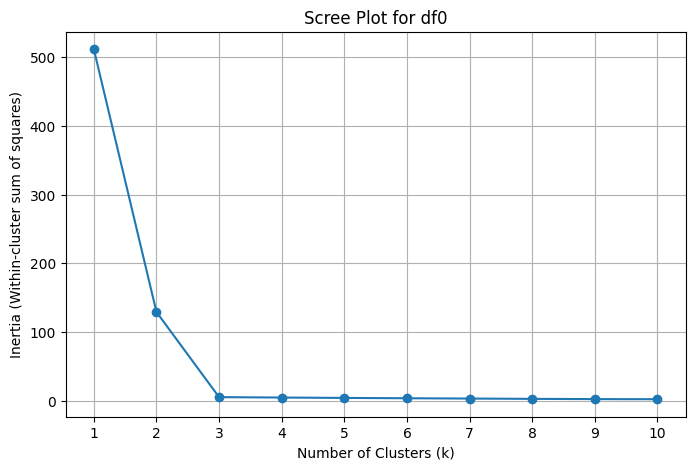

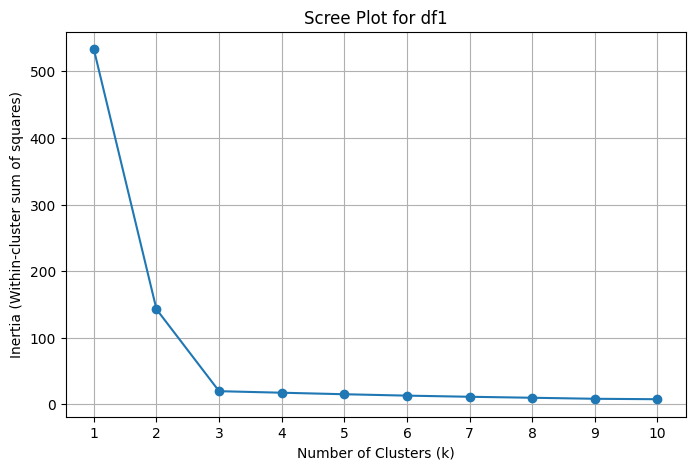

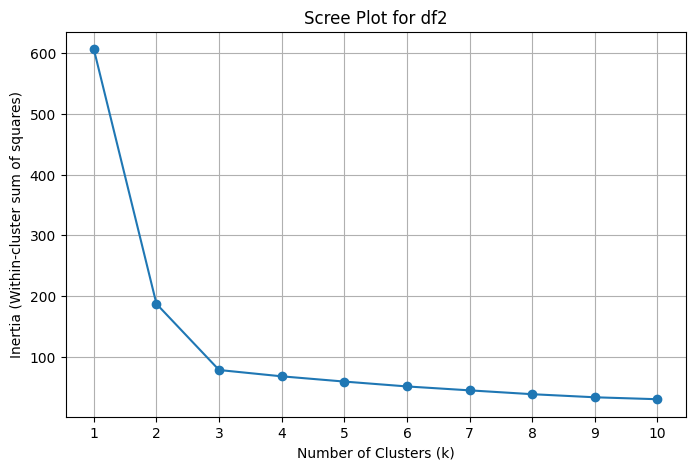

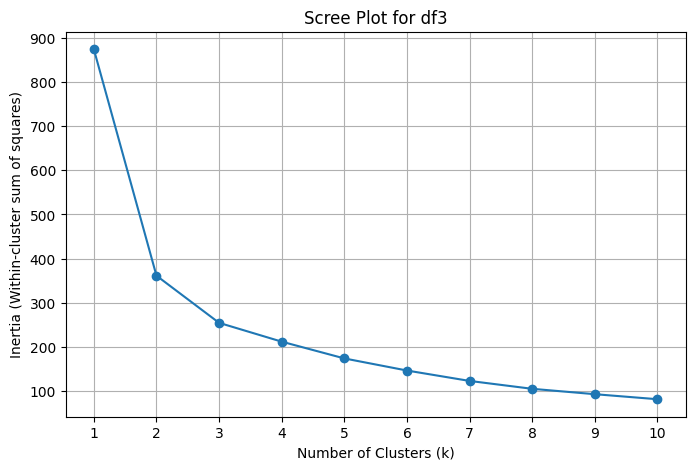

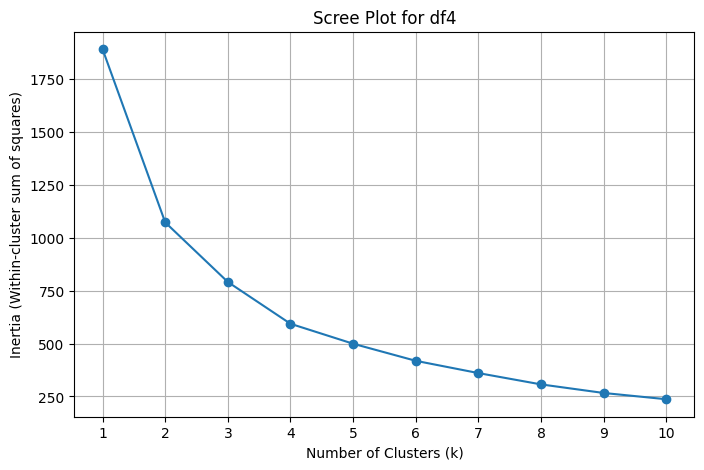

In [131]:
import matplotlib.pyplot as plt

for df_name, inertia in inertia_values.items():
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title(f'Scree Plot for {df_name}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-cluster sum of squares)')
    plt.xticks(range(1, 11))
    plt.grid(True)
    plt.show()

When the noise is low (df0_125 and df0_25), you can clearly see an “elbow” around k=3, which suggests that 3 clusters is probably the best choice. As the noise gets higher (df0_5 and df1_0), the elbow isn’t as obvious, so it’s harder to say for sure what the optimal k is. With the noisiest dataset (df2_0), the scree plot just looks really smooth with no clear elbow at all, which makes picking the right number of clusters pretty difficult. Basically, the more noise there is, the more it blurs the natural groupings in the data, and you can see that in how much weaker the elbows get.

#Q1.4

The elbow method is about looking at how inertia (the within-cluster sum of squares) changes as you increase the number of clusters, k. Inertia always goes down when you add more clusters, since points are closer to their centers, but the key thing is how much it goes down. At first, adding clusters makes a big difference, and then after a certain point it doesn’t help much anymore. That “turning point” is the elbow, and it shows you the best k because before it, you’re capturing real structure in the data, and after it, you’re mostly just dividing existing clusters or fitting noise.

In our simulation, the elbow method worked really well when the noise was low. The clusters were easy to see, and the elbow showed up clearly at k=3, which makes sense since that’s the real number of clusters. After k=3, the inertia barely goes down, so it’s obvious where to stop. But once the noise level gets higher, things change. The clusters spread out more and don’t look as clean, so the inertia decreases more slowly instead of dropping sharply. That makes the elbow harder to find, and sometimes it doesn’t show up at all. Basically, the more noise there is in the dataset, the less reliable the elbow method is for figuring out the “right” number of clusters. It’s still useful, but only when the data has well-defined groupings.


**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [132]:
#Q2.1
import pandas as pd

# Load the data
df_fundraising = pd.read_csv('/content/2022 election cycle fundraising.csv')

# Display the first few rows and the data types to understand the data
display(df_fundraising.head())
display(df_fundraising.info())

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         537 non-null    int64 
 1   Member        537 non-null    object
 2   Party         537 non-null    object
 3   State         537 non-null    object
 4   Chamber       537 non-null    object
 5   Raised        537 non-null    object
 6   Spent         537 non-null    object
 7   Cash on Hand  537 non-null    object
 8   Debts         537 non-null    object
dtypes: int64(1), object(8)
memory usage: 37.9+ KB


None

In [133]:
for col in ['Raised', 'Spent', 'Cash on Hand', 'Debts']:
    df_fundraising[col] = df_fundraising[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

display(df_fundraising.info())

display(df_fundraising.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         537 non-null    int64  
 1   Member        537 non-null    object 
 2   Party         537 non-null    object 
 3   State         537 non-null    object 
 4   Chamber       537 non-null    object 
 5   Raised        537 non-null    float64
 6   Spent         537 non-null    float64
 7   Cash on Hand  537 non-null    float64
 8   Debts         537 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 37.9+ KB


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3410303873.py:2: SyntaxWarning: invalid escape sequence '\$'
  df_fundraising[col] = df_fundraising[col].replace({'\$': '', ',': ''}, regex=True).astype(float)


None

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0


In [134]:
#Q2.2
from sklearn.preprocessing import MinMaxScaler

df_raised_spent = df_fundraising[['Raised', 'Spent']]

scaler = MinMaxScaler()

df_raised_spent_scaled = scaler.fit_transform(df_raised_spent)

df_raised_spent_scaled = pd.DataFrame(df_raised_spent_scaled, columns=['Raised_scaled', 'Spent_scaled'])

display(df_raised_spent_scaled.head())

,Raised_scaled,Spent_scaled
0,0.103512,0.098074
1,0.040686,0.016371
2,0.254404,0.183753
3,0.029527,0.015449
4,0.034148,0.021915


In [135]:
from sklearn.cluster import KMeans

inertia = []
X = df_raised_spent_scaled

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


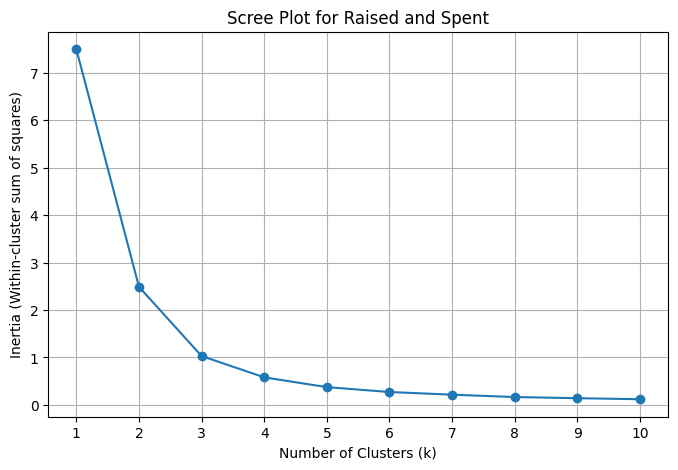

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Scree Plot for Raised and Spent')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [137]:
from sklearn.cluster import KMeans

optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_fundraising['Raised_Spent_Cluster'] = kmeans.fit_predict(df_raised_spent_scaled)

display(df_fundraising.head())

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Raised_Spent_Cluster
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0,0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,1
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0,0


In [138]:

cluster_counts = df_fundraising['Raised_Spent_Cluster'].value_counts().sort_values()

print("Cluster sizes:")
print(cluster_counts)

smallest_clusters_labels = cluster_counts.head(2).index.tolist()

print(f"\nIdentifying members of the smallest two clusters (Clusters {smallest_clusters_labels[0]} and {smallest_clusters_labels[1]}):")

smallest_clusters_members = df_fundraising[df_fundraising['Raised_Spent_Cluster'].isin(smallest_clusters_labels)]

display(smallest_clusters_members[['Member', 'Party', 'State', 'Chamber', 'Raised_Spent_Cluster']])

Cluster sizes:
Raised_Spent_Cluster
2      3
1     18
0    516
Name: count, dtype: int64

Identifying members of the smallest two clusters (Clusters 2 and 1):


,Member,Party,State,Chamber,Raised_Spent_Cluster
2,Adam Schiff,Democratic,California,House,1
87,Catherine Cortez Masto,Democratic,Nevada,Senate,1
89,Chuck Schumer,Democratic,New York,Senate,1
115,Dan Crenshaw,Republican,Texas,House,1
261,John Kennedy,Republican,Louisiana,Senate,1
290,Katie Porter,Democratic,California,House,1
298,Kevin McCarthy,Republican,California,House,1
326,Maggie Hassan,Democratic,New Hampshire,Senate,1
328,Marco Rubio,Republican,Florida,Senate,1
340,Mark Kelly,Democratic,Arizona,Senate,2


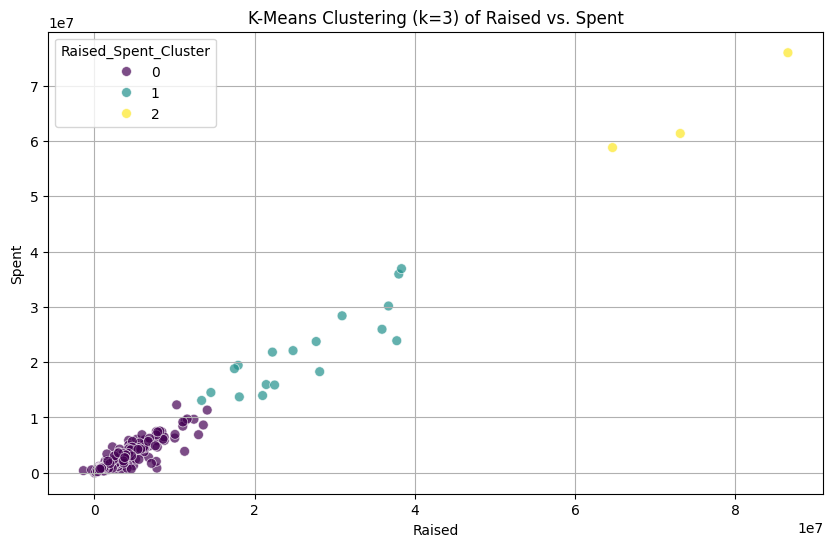

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fundraising, x='Raised', y='Spent', hue='Raised_Spent_Cluster', palette='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering (k=3) of Raised vs. Spent')
plt.xlabel('Raised')
plt.ylabel('Spent')
plt.grid(True)
plt.show()

Looking at the scatter plot of money raised vs. money spent, you can see three clear clusters. The biggest one is where most politicians fall, and it seems to represent the “average” group—people with moderate levels of fundraising and spending. Then there are two much smaller clusters up in the top right corner. These stand out because they represent politicians who raised and spent way more money than the rest of the group.

For the smaller clusters, Cluster 2 only has three politicians: Mark Kelly, Raphael Warnock, and Val Demings. Cluster 1 is a little bigger, with 18 politicians, including big names like Chuck Schumer, Nancy Pelosi, Kevin McCarthy, and Marco Rubio. Overall, these two clusters capture the high-profile candidates who had access to much more money for their campaigns compared to the bulk of politicians in the dataset.

In [140]:
#Q2.3
from sklearn.preprocessing import MinMaxScaler

df_cash_debts = df_fundraising[['Cash on Hand', 'Debts']]

scaler = MinMaxScaler()

df_cash_debts_scaled = scaler.fit_transform(df_cash_debts)

df_cash_debts_scaled = pd.DataFrame(df_cash_debts_scaled, columns=['Cash_on_Hand_scaled', 'Debts_scaled'])

display(df_cash_debts_scaled.head())

,Cash_on_Hand_scaled,Debts_scaled
0,0.040154,0.0
1,0.111166,0.0
2,0.920268,0.0
3,0.030150,0.0
4,0.050962,0.0


In [141]:
from sklearn.cluster import KMeans

inertia = []
# Use the scaled data for clustering
X = df_cash_debts_scaled

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

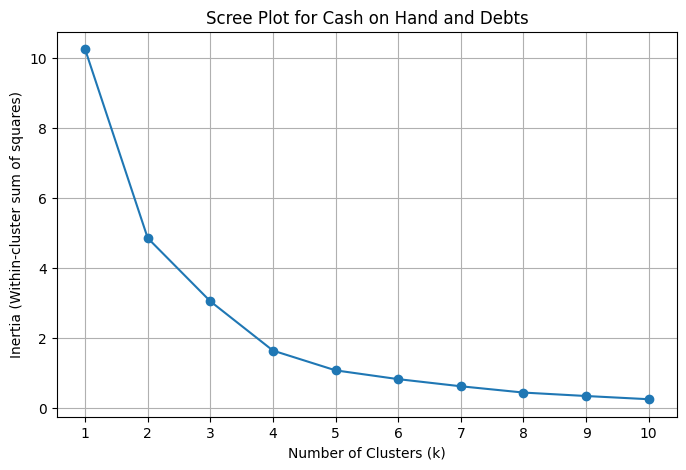

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Scree Plot for Cash on Hand and Debts')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [143]:
from sklearn.cluster import KMeans

# Using k=3 based on the scree plot
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_fundraising['Cash_Debts_Cluster'] = kmeans.fit_predict(df_cash_debts_scaled)

display(df_fundraising.head())

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Raised_Spent_Cluster,Cash_Debts_Cluster
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0,0,1
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0,0,1
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,1,2
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0,0,1
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0,0,1


In [144]:
cash_debts_cluster_counts = df_fundraising['Cash_Debts_Cluster'].value_counts().sort_values()

print("Cluster sizes (Cash on Hand vs. Debts):")
print(cash_debts_cluster_counts)

smallest_cash_debts_clusters_labels = cash_debts_cluster_counts.head(2).index.tolist()

print(f"\nIdentifying members of the smallest two clusters (Clusters {smallest_cash_debts_clusters_labels[0]} and {smallest_cash_debts_clusters_labels[1]}) based on Cash on Hand and Debts:")

smallest_cash_debts_clusters_members = df_fundraising[df_fundraising['Cash_Debts_Cluster'].isin(smallest_cash_debts_clusters_labels)]

display(smallest_cash_debts_clusters_members[['Member', 'Party', 'State', 'Chamber', 'Cash_Debts_Cluster']])

Cluster sizes (Cash on Hand vs. Debts):
Cash_Debts_Cluster
0      2
2     24
1    511
Name: count, dtype: int64

Identifying members of the smallest two clusters (Clusters 0 and 2) based on Cash on Hand and Debts:


,Member,Party,State,Chamber,Cash_Debts_Cluster
2,Adam Schiff,Democratic,California,House,2
11,Alex Padilla,Democratic,California,Senate,2
45,Bernie Sanders,Independent,Vermont,Senate,2
89,Chuck Schumer,Democratic,New York,Senate,2
112,Cory Booker,Democratic,New Jersey,Senate,2
133,David Trone,Democratic,Maryland,House,0
239,Jim Jordan,Republican,Ohio,House,2
247,Joe Manchin,Democratic,West Virginia,Senate,2
261,John Kennedy,Republican,Louisiana,Senate,2
267,John Thune,Republican,South Dakota,Senate,2


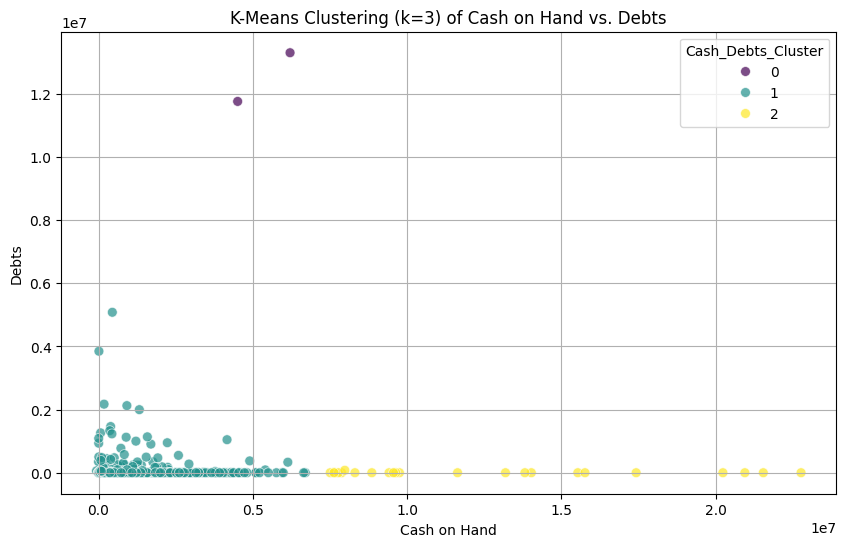

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fundraising, x='Cash on Hand', y='Debts', hue='Cash_Debts_Cluster', palette='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering (k=3) of Cash on Hand vs. Debts')
plt.xlabel('Cash on Hand')
plt.ylabel('Debts')
plt.grid(True)
plt.show()

For Raised vs. Spent, the smaller clusters are basically the politicians who raised and spent way more than everyone else. These are the big-name candidates with the huge budgets.

For Cash on Hand vs. Debts, the smallest clusters tell a different story. Here, it’s the people who either had a ton of money left over, a lot of debt, or sometimes both. Some of the names overlap with the Raised/Spent group,, like Schumer, Schiff, Rubio, Kelly, Warnock, Johnson, and Scott, but then there are new ones like Manchin, McConnell, Jim Jordan, and others. That shows that raising and spending the most money doesn’t always mean you end up with the most cash or debt at the end. Some candidates are just more efficient with their funds and keep a surplus, while others carry debt over from past elections.

So the big takeaway is that looking at different financial variables in clustering gives you different insights. Raised/Spent is more about who the biggest fundraisers are, while Cash on Hand/Debts tells you more about how candidates manage their money.

In [146]:
from sklearn.preprocessing import MinMaxScaler

df_all_numeric = df_fundraising[['Raised', 'Spent', 'Cash on Hand', 'Debts']]

scaler = MinMaxScaler()

df_all_numeric_scaled = scaler.fit_transform(df_all_numeric)

df_all_numeric_scaled = pd.DataFrame(df_all_numeric_scaled, columns=['Raised_scaled', 'Spent_scaled', 'Cash_on_Hand_scaled', 'Debts_scaled'])

display(df_all_numeric_scaled.head())

,Raised_scaled,Spent_scaled,Cash_on_Hand_scaled,Debts_scaled
0,0.103512,0.098074,0.040154,0.0
1,0.040686,0.016371,0.111166,0.0
2,0.254404,0.183753,0.920268,0.0
3,0.029527,0.015449,0.030150,0.0
4,0.034148,0.021915,0.050962,0.0


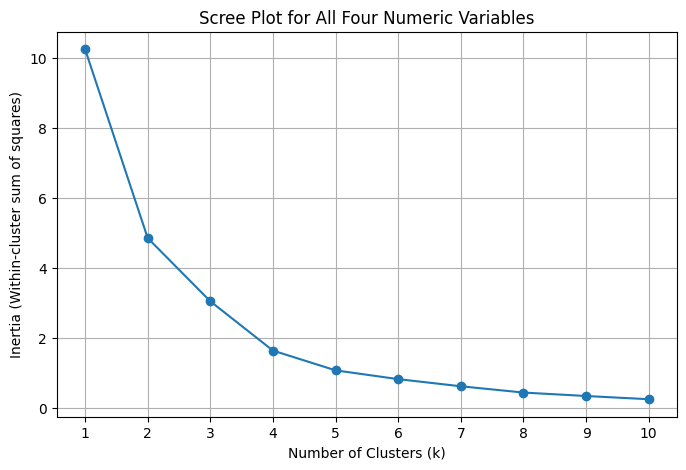

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Scree Plot for All Four Numeric Variables')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [148]:
from sklearn.cluster import KMeans

# Using k=3 as the optimal number of clusters
optimal_k = 3

# Initialize and run KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_fundraising['All_Variables_Cluster'] = kmeans.fit_predict(df_all_numeric_scaled)

# Display the head with the new cluster labels
display(df_fundraising.head())

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Raised_Spent_Cluster,Cash_Debts_Cluster,All_Variables_Cluster
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0,0,1,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0,0,1,0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,1,2,1
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0,0,1,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0,0,1,0


Q2.4
When we cluster using all four variables; Raised, Spent, Cash on Hand, and Debts, we’re basically looking at a fuller picture of each politician’s finances instead of just one piece at a time. The clusters that come out of this are grouping people based on their overall financial profiles.

Compared to the earlier analyses, you would expect to see some overlap with the “big money” politicians from the Raised/Spent clusters and some of the high cash or high debt politicians from the Cash on Hand/Debts clusters. But adding all four variables lets us see more detailed differences. An example, someone could raise and spend a ton but also be in heavy debt, or maybe they raised and spent a moderate amount but managed to keep a lot of cash on hand. Those kinds of combinations don’t show up as clearly when we only use two variables.

So, clustering with all four variables gives us a more nuanced view, it doesn’t just tell us who raised the most or who has the most debt, but it shows how these different financial aspects interact and puts politicians into groups that reflect their overall campaign finance strategy.

Q2.5:
One clear takeaway is that k-means was good at spotting outliers or distinct groups. In every analysis, it picked out smaller clusters that represented politicians who stood out financially,usually the big name or very well funded candidates.

It also helped reveal different kinds of financial strategies. When we looked at different sets of variables, we could see how some politicians raised and spent huge amounts, while others stood out more for having high cash left over or carrying a lot of debt. That shows that not every campaign works the same way, some focus on raising and spending, and others end up in unique financial situations.

Another useful part is that clustering makes the whole dataset easier to understand. Instead of looking at every politician one by one, k-means groups similar ones together so we can see overall trends and spot the exceptions.

Of course, k-means doesn’t explain the “why” behind the numbers, for example, it won’t tell us why a politician has so much debt, but it gives us a strong starting point by flagging the patterns in the data. From there, we can dig deeper into what might be driving those differences in campaign finance profiles.